# 1. CNN(Convolutional Neural Networks)
* 커널 기반의 Convolution 연산을 사용하여 이미지 처리에 적합한 네트워크
* 이미지의 특징을 잘 추출하여 압축하는데 적합한 구조

![](https://i.imgur.com/yn9B3Et.jpg)

# 2. 이미지 데이터
* 컬러 이미지는 3개의 채널로 이루어진 텐서
* 컴퓨터는 이미지를 숫자로 인식하여 연산을 함

<img src="https://i.imgur.com/mD4nKK1.png" width="300px">

* 0~255까지 256개의 숫자로 표현
* 빨강 255, 파랑 255, 초록 255 → 흰색
* 빨강 0, 파랑 0, 초록 0 → 검정색
* 빨강 255, 파랑 0, 초록 0 → 빨간색

<img src="https://i.imgur.com/bljeUqc.png" width="300px">

# 3. Convolution 연산

![](https://i.imgur.com/2MiTVss.png)
* -------------  
* Convolution 연산을 진행하면 출력 텐서의 크기가 작아짐
* 출력 크기를 동일하게 하기 위해 Padding을 사용
![](https://i.imgur.com/fUuvC2r.gif)

* 컬러 이미지에는 2D Convolution 연산을 사용
![](https://i.imgur.com/AzbJCgg.gif)

* 중요한 특징을 추출하고, 차원을 축소하기 위해 Pooling 연산을 사용
    * MaxPool2d
    * AvgPool2d
* 필터를 적용하는 간격을 설정하는 것을 스트라이드(Stride)라고 함
![](https://i.imgur.com/Ve8xWUh.gif)

# 4. CNN 체험
- 관련 링크 : https://adamharley.com/nn_vis/

# 5. CNN을 구성하는 레이어
* Conv2D : 특징 추출
* ReLU : 활성화
* MaxPool2d : 차원 축소
* Conv2D : 특징 추출
* ReLU : 활성화
* MaxPool2d : 차원 축소
* ... 반복...
* Flatten : 3차원 → 1차원
* Linear : 선형 회귀
* ReLU : 활성화
* ... 반복...
* Sigmoid (or Softmax) : 출력

# 6. 간단한 CNN 모델 만들기 실습

In [1]:
import torch
import torch.nn as nn
import torch.optim as optim

In [2]:
            # 배치 크기x채널x높이x너비    # 채널(1:그레이스케일, 3:컬러)
inputs = torch.Tensor(1, 1, 28, 28)
print(inputs.shape)

torch.Size([1, 1, 28, 28])


In [3]:
# 첫 번째, Conv2D
conv1 = nn.Conv2d(in_channels = 1, out_channels = 32, kernel_size = 3, padding = 'same') # padding = 'same' : 처음 크기대로 패딩
out = conv1(inputs)
print(out.shape)

torch.Size([1, 32, 28, 28])


In [4]:
# 첫 번째, MaxPool2d
pool = nn.MaxPool2d(kernel_size = 2)
out = pool(out)
print(out.shape)

torch.Size([1, 32, 14, 14])


In [5]:
# 두 번째, Conv2D
conv2 = nn.Conv2d(in_channels = 32, out_channels = 64, kernel_size = 3, padding = 'same')
out = conv2(out)
print(out.shape)

torch.Size([1, 64, 14, 14])


In [6]:
# 두 번째, MaxPool2d
pool = nn.MaxPool2d(kernel_size = 2)
out = pool(out)
print(out.shape)

torch.Size([1, 64, 7, 7])


In [8]:
# Faltten
# 배치를 제외한 3차원 데이터를 1차원으로 펼침
# 1차원으로 만들어야 nn.Linear() 레이어에 넣을 수 있음
flatten = nn.Flatten()
out = flatten(out)
print(out.shape) # 64 x 7 x 7

torch.Size([1, 3136])


In [10]:
# Dense(Fully Connected)
# 선형 회귀
fc = nn.Linear(3136, 10)
out = fc(out)
print(out.shape)

torch.Size([1, 10])


# 7. CNN으로 MNIST 분류하기

In [11]:
import torch
import torchvision.datasets as datasets
import torchvision.transforms as transforms
import matplotlib.pyplot as plt

In [12]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
print(device)

cpu


In [14]:
train_data = datasets.MNIST(
    root = 'data',
    train = True,
    transform = transforms.ToTensor(),
    download = True
)

100.0%


Extracting data\MNIST\raw\train-images-idx3-ubyte.gz to data\MNIST\raw


100.0%


Extracting data\MNIST\raw\train-labels-idx1-ubyte.gz to data\MNIST\raw




19.9%

100.0%


Extracting data\MNIST\raw\t10k-images-idx3-ubyte.gz to data\MNIST\raw



100.0%

Extracting data\MNIST\raw\t10k-labels-idx1-ubyte.gz to data\MNIST\raw



In [15]:
test_data = datasets.MNIST(
    root = 'data',
    train = False,
    transform = transforms.ToTensor(),
    download = True
)

In [16]:
print(train_data)
print(test_data)

Dataset MNIST
    Number of datapoints: 60000
    Root location: data
    Split: Train
    StandardTransform
Transform: ToTensor()
Dataset MNIST
    Number of datapoints: 10000
    Root location: data
    Split: Test
    StandardTransform
Transform: ToTensor()


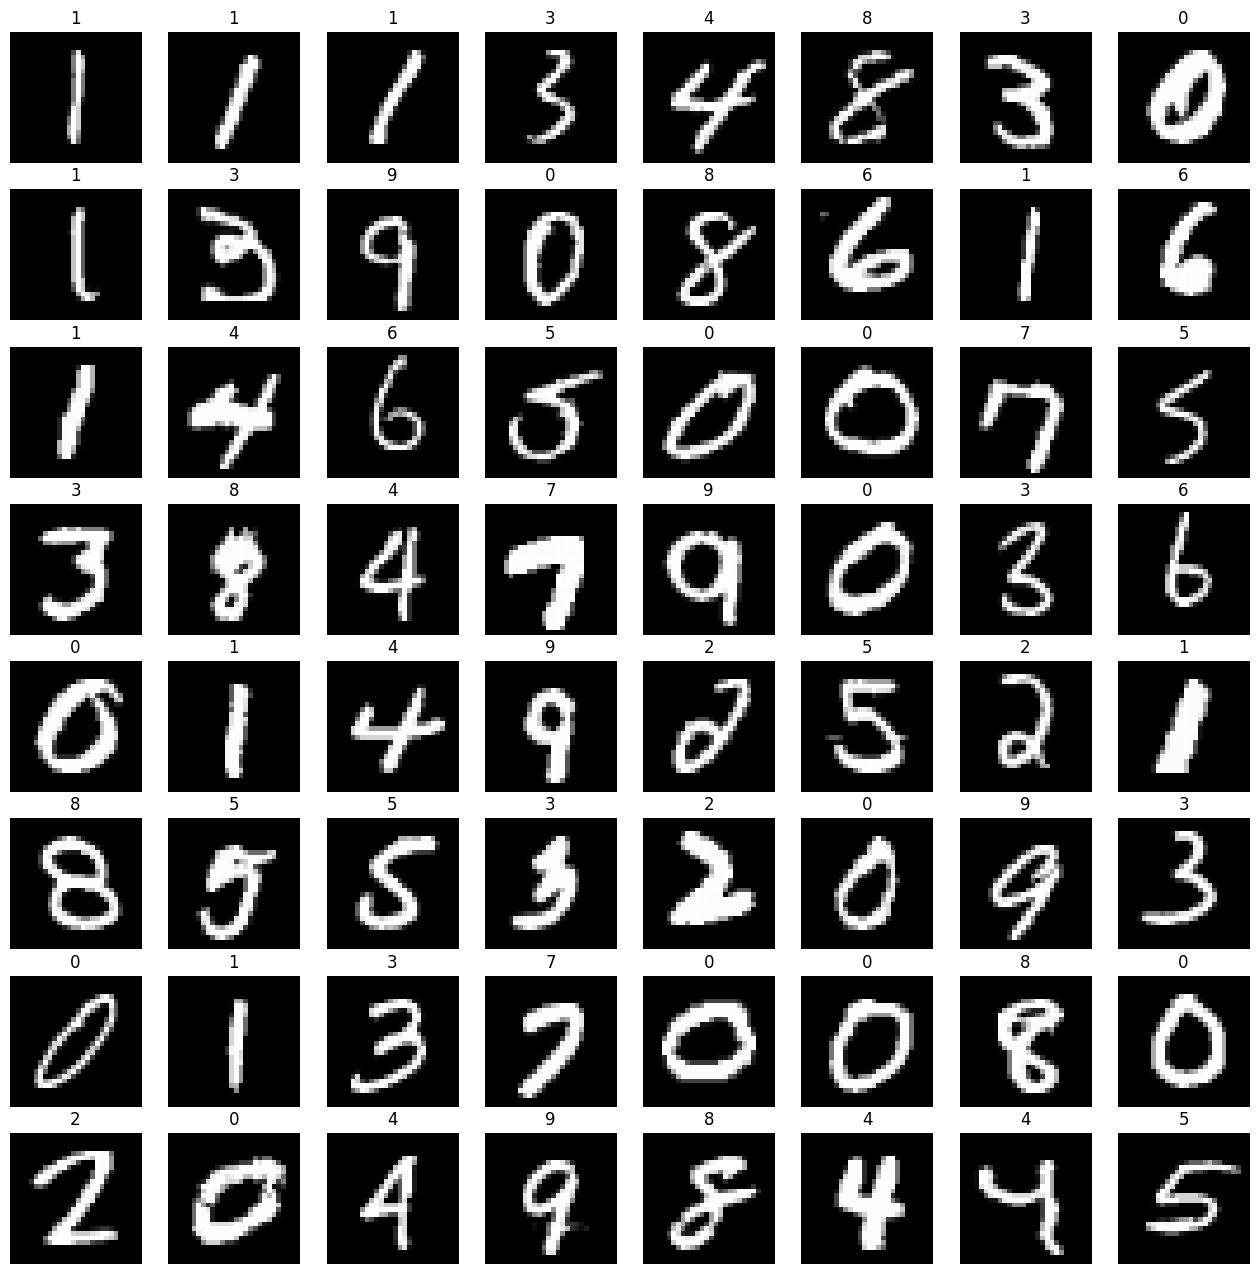

In [17]:
loader = torch.utils.data.DataLoader(
    dataset=train_data,
    batch_size=64,
    shuffle=True
)

imgs, labels = next(iter(loader))

fig, axes = plt.subplots(8, 8, figsize=(16, 16))

for ax, img, label in zip(axes.flatten(), imgs, labels):
    ax.imshow(img.reshape((28, 28)), cmap='gray')
    ax.set_title(label.item())
    ax.axis('off')

In [18]:
model = nn.Sequential(
    nn.Conv2d(1, 32, kernel_size=3, padding = 'same'),
    nn.ReLU(),
    nn.MaxPool2d(kernel_size=2),
    
    nn.Conv2d(32, 64, kernel_size=3, padding = 'same'),
    nn.ReLU(),
    nn.MaxPool2d(kernel_size=2),
    
    nn.Flatten(),
    nn.Linear(7 * 7 * 64, 10)
).to(device)

print(model)

Sequential(
  (0): Conv2d(1, 32, kernel_size=(3, 3), stride=(1, 1), padding=same)
  (1): ReLU()
  (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (3): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=same)
  (4): ReLU()
  (5): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (6): Flatten(start_dim=1, end_dim=-1)
  (7): Linear(in_features=3136, out_features=10, bias=True)
)


In [19]:
# 학습

optimizer = optim.Adam(model.parameters(), lr=0.001)

epochs = 10

for epoch in range(epochs):
    sum_losses = 0
    sum_accs = 0
    
    for x_batch, y_batch in loader:
        x_batch = x_batch.to(device)
        y_batch = y_batch.to(device)
        
        y_pred = model(x_batch)
        loss = nn.CrossEntropyLoss()(y_pred, y_batch)
        
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        # 배치 단위 loss 저장
        sum_losses = sum_losses + loss.item()
        # 배치 단위 정확도 저장
        y_prob = nn.Softmax(1)(y_pred)
        y_pred_index = torch.argmax(y_prob, axis=1)
        acc = (y_batch == y_pred_index).float().sum() / len(y_batch) * 100
        
        sum_accs = sum_accs + acc.item()
        
    avg_loss = sum_losses / len(loader)
    avg_acc = sum_accs / len(loader)
    
    print(f'Epoch {epoch+1:4d}/{epochs} Loss: {avg_loss:.6f} Accuracy: {avg_acc:.2f}%')

Epoch    1/10 Loss: 0.178297 Accuracy: 94.85%
Epoch    2/10 Loss: 0.054888 Accuracy: 98.36%
Epoch    3/10 Loss: 0.039318 Accuracy: 98.80%
Epoch    4/10 Loss: 0.032146 Accuracy: 99.01%
Epoch    5/10 Loss: 0.026217 Accuracy: 99.18%
Epoch    6/10 Loss: 0.020699 Accuracy: 99.34%
Epoch    7/10 Loss: 0.016857 Accuracy: 99.46%
Epoch    8/10 Loss: 0.013727 Accuracy: 99.55%
Epoch    9/10 Loss: 0.012141 Accuracy: 99.61%
Epoch   10/10 Loss: 0.009733 Accuracy: 99.67%


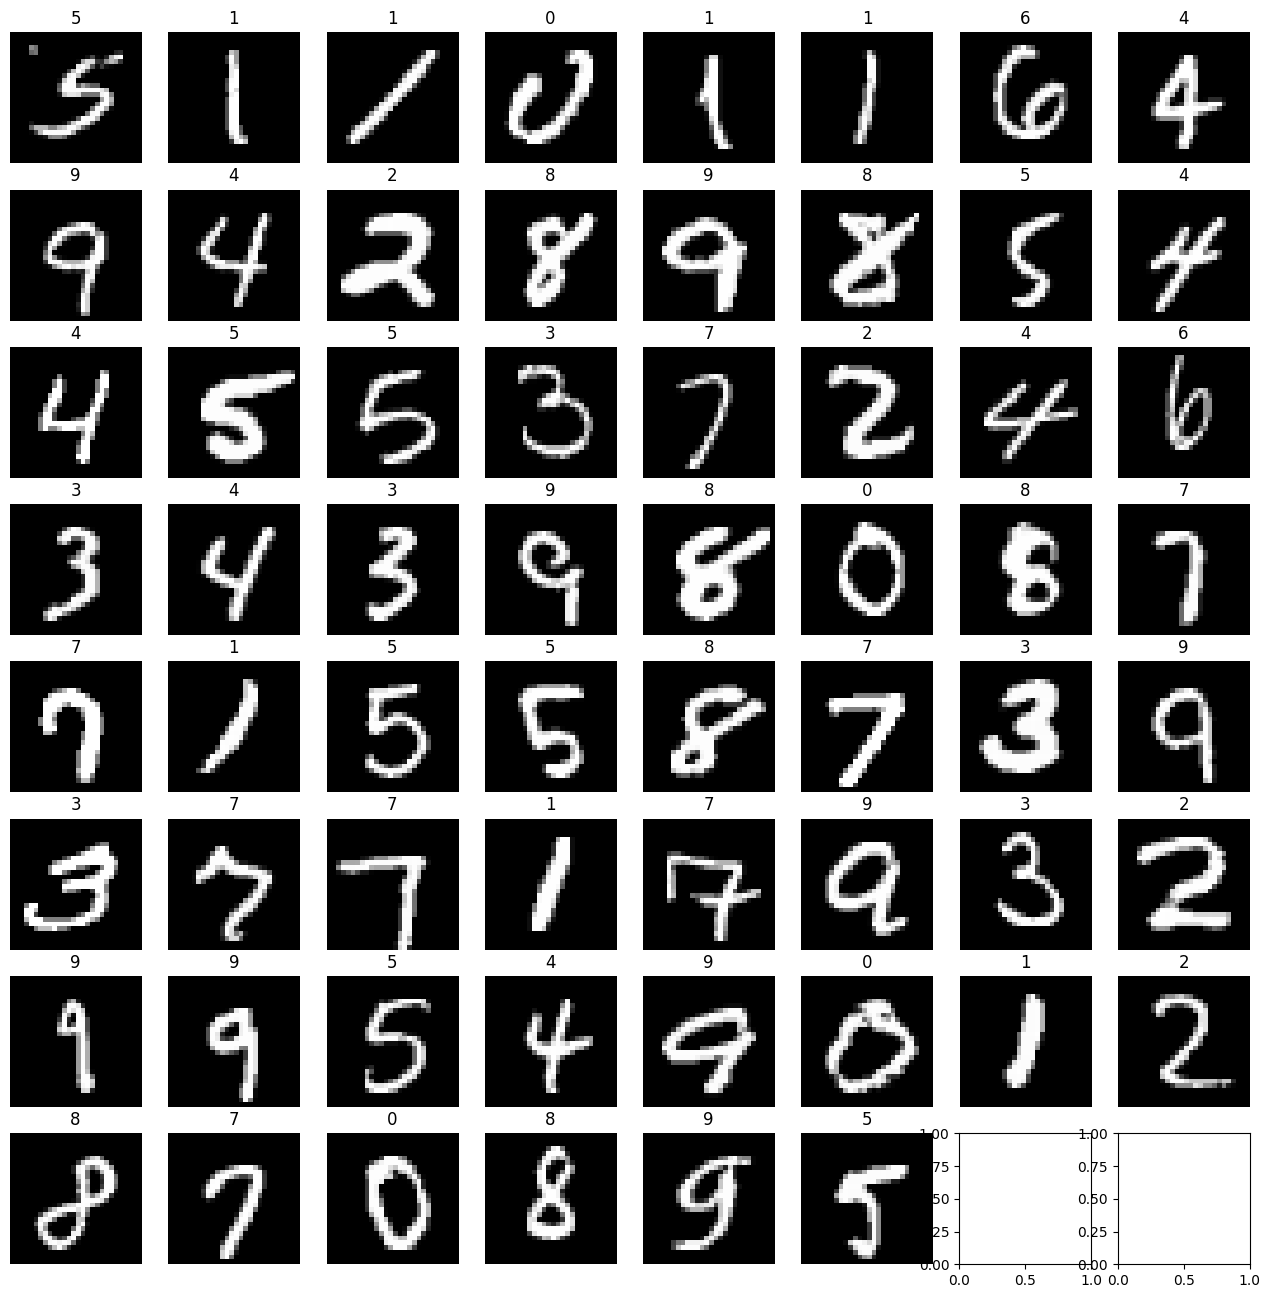

In [20]:
test_loader = torch.utils.data.DataLoader(
    dataset = test_data,
    batch_size = 62,
    shuffle = True,
)

imgs, labels = next(iter(test_loader))

fig, axes = plt.subplots(8, 8, figsize=(16, 16))

for ax, img, label in zip(axes.flatten(), imgs, labels):
    ax.imshow(img.reshape((28, 28)), cmap='gray')
    ax.set_title(label.item())
    ax.axis('off')

In [21]:
model.eval() # 모델을 Test 모드로 전환

sum_accs = 0

for x_batch, y_batch in test_loader:
    x_batch = x_batch.to(device)
    y_batch = y_batch.to(device)
    
    y_pred = model(x_batch)
    
    y_prob = nn.Softmax(1)(y_pred)
    y_pred_index = torch.argmax(y_prob, axis=1)
    acc = (y_batch == y_pred_index).float().sum() / len(y_batch) * 100
    
    sum_accs = sum_accs + acc
    
avg_acc = sum_accs / len(test_loader)

print(f'테스트 정확도는 {avg_acc:.2f}% 입니다!')

테스트 정확도는 99.11% 입니다!
